In [8]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import sklearn.datasets

In [9]:
iris=datasets.load_iris()

In [11]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.25)
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
accuracy=metrics.accuracy_score(y_test, y_pred)    
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.868421052632


In [6]:
import pandas as pd
import numpy as np
import math
import operator
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
cv_scores = []
neighbors = list(np.arange(3,50,2))
print(neighbors)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n,algorithm = 'brute')
    
    cross_val = cross_val_score(knn,X_train,y_train,cv = 10 , scoring = 'accuracy')
    cv_scores.append(cross_val.mean())
    
error = [1-x for x in cv_scores]
optimal_n = neighbors[ error.index(min(error)) ]
knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n,algorithm = 'brute')
knn_optimal.fit(X_train,y_train)
pred = knn_optimal.predict(X_test)
acc = accuracy_score(y_test,pred)*100
print("The accuracy for optimal k = {0} using brute is {1}".format(optimal_n,acc))
print("classification_report using brute force")
print(classification_report(y_test,pred))

[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39, 41, 43, 45, 47, 49]
The accuracy for optimal k = 13 using brute is 92.10526315789474
classification_report using brute force
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        11
          1       0.94      0.88      0.91        17
          2       0.82      0.90      0.86        10

avg / total       0.92      0.92      0.92        38



In [7]:
from sklearn.svm import SVC

97.3684210526


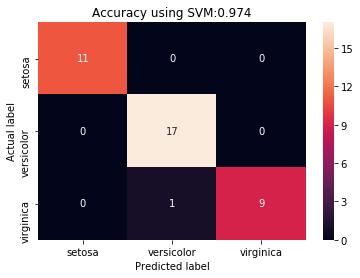

In [8]:
s1=SVC(kernel = 'linear').fit(X_train, y_train)
s1_pred=s1.predict(X_test)
acc = accuracy_score(y_test,s1_pred)*100
print(acc)
cm = confusion_matrix(y_test, s1_pred)
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using SVM:{0:.3f}'.format(accuracy_score(y_test, s1_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

[[11  0  0]
 [ 0 15  2]
 [ 0  1  9]]


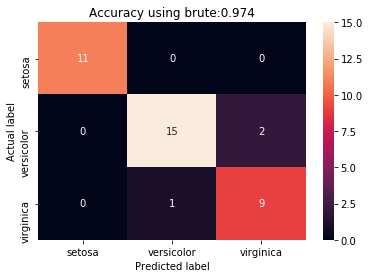

In [9]:

# Creates a confusion matrix
cm = confusion_matrix(y_test, pred)
print(cm)
# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

sns.heatmap(cm_df, annot=True)
plt.title('Accuracy using brute:{0:.3f}'.format(accuracy_score(y_test, y_pred)))
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [59]:
for i in range(len(y_test)):
    if y_test[i]==y_pred[i]:
        print("correct prediction")
    else:
        print("wrong prediction", y_test[i],y_pred[i])
print(y_test)
print(y_pred)

correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
wrong prediction 1 2
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
correct prediction
[0 1 0 1 1 2 0 0 0 1 0 2 2 2 0 2 0 2 0 1 2 1 1 0 0 0 2 0 1 0 0 0 1 2 2 0 0
 1]
[0 1 0 1 1 2 0 0 0 1 0 2 2 2 0 2 0 2 0 2 2 1 1 0 0 0 2 0 1 0 0 0 1 2 2 0 0
 1]


In [39]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
